# Regressão

In [1]:
import pandas as pd

import seaborn as sns

from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Load gun violence dataset
gun_violence = pd.read_csv('../databases/gun_violence_clean.zip', compression='zip')

gun_register = pd.read_csv('../databases/gun_register.zip', compression='zip')

states = pd.read_csv('../databases/states.zip')

In [3]:
gun_register.head()

,state,guns_per_capita,guns_registered
0,Wyoming,229.24,132.806
1,Washington D.C.,68.05,47.228
2,New Hampshire,46.76,64.135
3,New Mexico,46.73,97.580
4,Virginia,36.34,307.822


In [4]:
gun_states = pd.merge(states, gun_register, on='state')
gun_states.head()

,state,n_injured,n_incidents,n_killed,population,injured_per_capita,incidents_per_capita,killed_per_capita,n_injured_2014,n_incidents_2014,...,incidents_per_capita_2016,killed_per_capita_2016,n_injured_2017,n_incidents_2017,n_killed_2017,injured_per_capita_2017,incidents_per_capita_2017,killed_per_capita_2017,guns_per_capita,guns_registered
0,Alabama,614,1411,804,4858876.50,3.159167,7.259909,4.136759,47,124,...,8.345761,4.810119,354,812,493,7.261360,16.656000,10.112572,33.15,161.641
1,Alaska,105,557,153,738786.00,3.553126,18.848489,5.177413,7,25,...,28.725401,7.821940,35,198,60,4.731098,26.764497,8.110454,21.38,15.824
2,Arizona,323,776,550,6890441.00,1.171913,2.815495,1.995518,30,76,...,3.426703,2.562828,156,367,252,2.213119,5.206504,3.575038,25.61,179.738
3,Arkansas,511,993,378,2984885.00,4.279897,8.316903,3.165951,26,72,...,9.229504,3.344023,322,552,198,10.722621,18.381637,6.593413,26.57,79.841
4,California,1861,5180,2265,39046689.25,1.191522,3.316542,1.450187,70,219,...,3.876648,1.634823,953,2636,1167,2.418822,6.690466,2.961978,8.71,344.622


In [5]:
X = gun_states['guns_registered'].values.reshape(-1,1)
y = gun_states['n_incidents'].values.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

lin_regr = linear_model.LinearRegression()
lin_regr.fit(X_train, y_train)

y_pred = lin_regr.predict(X_test)

print(f'Coefficient: {lin_regr.coef_}')
print(f'Intercept: {lin_regr.intercept_}')
print(f'Mean squared error: {mean_squared_error(y_test, y_pred):.2f}' )
print('R2: %.2f' % r2_score(y_test, y_pred))

Coefficient: [[7.69189726]]
Intercept: [832.07991705]
Mean squared error: 542281.65
R2: 0.75


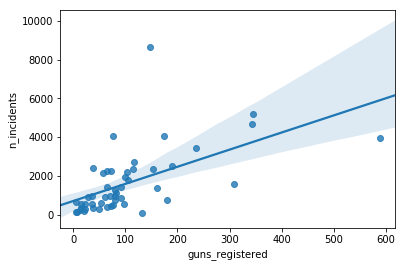

In [6]:
sns.regplot(x='guns_registered', y='n_incidents', data=gun_states)